# $$Regressão~Linear~Multipla$$

### $$Conceito:$$
    

**Regressão Linear Múltipla** é um modelo de análise que usamos quando modelamos a relação linear entre uma variável contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas(Dummies)


### $$Quando~usar ~Regressão~ Linear~ Múltipla?$$


Podemos usar a Regressão Linear Múltipla quando o objetivo da pesquisa envolve:

- Projetar o valor de uma variável target através de um conjunto de outras variáveis preditoras


- Investigar que variáveis se relacionam com a variável Target


- Verificar qual conjunto de variáveis traz uma melhor explicação para a variável Target







### $$Critérios:$$

**Modelo dos mínimos quadrados (OLS)** = Somatória dos erros² (Elimina os negativos) seja a mínima possível, quanto mais próxima de 0, melhor o modelo


Reta de regressão precisa ter a somatória dos erros (Positivo e Negativo) = 0


Variáveis somente quantitativas


Distribuição Normal dos dados



### $$Coeficientes:$$

**Intercepto (𝛼)** = Constante do modelo 


**Beta (𝛽)** = Coeficiente angular do modelo


**u**= Termo de erro




__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$   

## $$Criar ~um ~modelo~ de~ regressão~ linear~ Multipla$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
# Pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import statsmodels.api as sm

# Banco de dados 

In [2]:
#Base de dados
dados = pd.read_csv('paises.csv',encoding='latin-1',sep=',')
dados.head()

,pais,cpi,idade,horas
0,Argentina,3.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,4.0,59,35.0


In [3]:
#Shape dos dados
dados.shape

(50, 4)

**Tabela com 50 observações e 4 variáveis**

# $$Dicionário~ de~ Dados~ das~ variáveis$$

### **$$Variáveis:$$**

**pais:** Nome do País


**cpi:** Indice de percepção de corrupção dos habitante do País, Nota varia de 0 a 10, quanto maior a nota, melhor a percepção do mecanismo de corrupção
    
    
**idade:** Idade media dos bilhonarios do país
    
    
**horas:** Quantidade de horas trabalhadas em media por semana pela população economicamente ativa no País

# Analise Exploratória

In [4]:
#Transformar coluna em indice
dados = dados.set_index('pais')
dados.head()

,cpi,idade,horas
pais,,,
Argentina,3.9,72,35.0
Australia,8.7,64,32.0
Austria,7.9,72,32.0
Belgium,7.1,67,30.1
Brazil,4.0,59,35.0


In [5]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Argentina to Venezuela
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpi     50 non-null     float64
 1   idade   50 non-null     int64  
 2   horas   50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


**Temos 3 variáveis quantitativa**

In [6]:
#Descrição dos dados
dados.describe()

,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


# Gráfico de Dispersão 

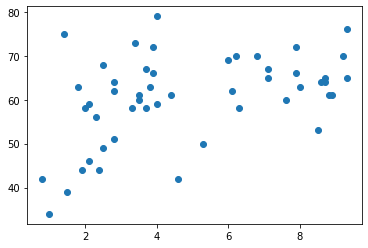

In [7]:
# cpi X idade
plt.scatter(x=dados['cpi'] ,y =dados['idade']);

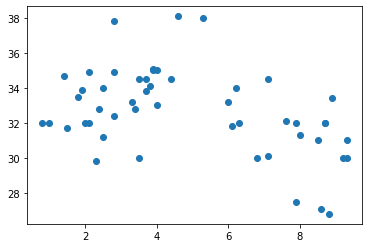

In [8]:
# cpi X horas
plt.scatter(x=dados['cpi'] ,y =dados['horas']);

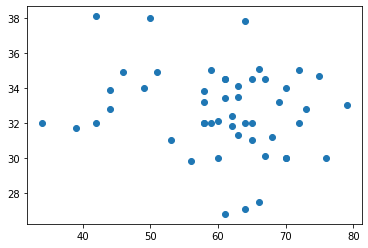

In [9]:
# idade X horas
plt.scatter(x=dados['idade'] ,y =dados['horas']);

In [10]:
#Correlação de Pearson
dados.corr()

,cpi,idade,horas
cpi,1.000000,0.442838,-0.435724
idade,0.442838,1.000000,-0.191748
horas,-0.435724,-0.191748,1.000000


**Muita das vezes graficamente vai ser difícil saber se há uma correlação forte ou fraca entre 2 variáveis, uma maneira mais fácil é criar uma correlação de Pearson**

**Note que há uma correlação fraca entre as variáveis 'horas', 'idade' e uma correlação media entre as variáveis 'idade','cpi' e 'cpi','horas'**

# Modelagem - Regressão linear multipla

In [11]:
#Separar as variáveis X e Y

x=dados[['idade','horas']] 

y =dados['cpi']

In [12]:
#Criar o modelo

#Somente o Coeficiente angular
modelo_coeangular = sm.OLS(y,x)

# Somente o Intercept
x_interc = sm.add_constant(x) 

# Modelo de regressão linear multipla
modelo = sm.OLS(y,x_interc)

# Treinar o modelo
resultado = modelo.fit() 

# Verificar os dados do modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           0.000101
Time:                        08:46:15   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Definição dos coeficientes:

**R-squared(R²)** = Indica em forma de porcentagem o quanto da variável Dependente(y) é explicada através da variável Explicativas(X)

**F-statistic:** = Permite analisar se pelo menos um dos betas é estatisticamente significante para a explicação do comportamento de Y

**Df Residuals:** = São os graus de liberdade, o cálculo se dá através do número de observações do dataframe menos o número de parâmetros do algoritmo, o número também representa o máximo de variáveis explicativas eu posso ter em meu modelo**

**Teste t:** = Verifica de forma individual se a variável é estatisticamente significante para a explicação do comportamento de Y


## Calculo do R²:

**Formula:**
    
R² = SQM/(SQM+SQE)

In [13]:
#Media dos dados da variavel target 
media_dados = np.mean(y)
media_dados

4.894000002145767

In [14]:
# Previsao do modelo
fitted = resultado.fittedvalues
dados['fitted'] = fitted
fitted[0:5]

pais
Argentina    5.103394
Australia    5.509820
Austria      6.307404
Belgium      6.571454
Brazil       3.807319
dtype: float64

In [15]:
#Erro do modelo
dados['Erro'] = resultado.resid
print(resultado.resid[0:5])
print(f'\nSoma dos Erros: {round(sum(resultado.resid),2)}')

pais
Argentina   -1.203394
Australia    3.190180
Austria      1.592596
Belgium      0.528546
Brazil       0.192681
dtype: float64

Soma dos Erros: 0.0


**Diferença entre o valor previsto e o valor real, soma dos valores precisa ser 0 para obter o melhor modelo**

In [16]:
#Soma dos erro do modelo²(SQE)
dados['SQE'] = resultado.resid**2
SQE = sum(resultado.resid**2)
SQE

237.7730069054655

**Soma dos erros do modelo ao quadrado para eliminar os valores negativos**

In [17]:
# SQM  
SQM = (media_dados - fitted)**2
dados['SQM'] = SQM
SQM = sum(SQM)

#Ou

resultado.mse_model

56.947597459862436

**Diferença entre a media dos dados menos a previsão do modelo ao quadrado**

In [18]:
#R²
r2 = SQM/(SQM+SQE)
r2

0.32387117836812795

**Note que as variáveis X explicam 32% da variável Y, portanto 68% restante são explicadas por variáveis não presentes na amostra**

## Calculo do F de Fisher-Snedecor

In [19]:
#Calculo da distribuição F

#Numero de parametros do modelo
K = len(resultado.cov_params())

#Numero de observações da base de dados
n = len(dados) 

#Calculo 
F = (SQM/(K-1))/(SQE/(n-K))

#P_Valor do calculo do F de Fisher-Snedecor
resultado.f_pvalue


0.00010131927089412321

**Como o P_valor do cálculo da estatística F é menor que 0.05, concluímos que pelo menos 1 coeficiente Beta é estatisticamente significante, diferente de 0, portanto há modelo**

## Teste t

In [20]:
resultado.pvalues

const    0.024868
idade    0.003731
horas    0.004550
dtype: float64

**As 2 variáveis explicativas se mostram estatisticamente significantes para a construção do modelo**  

In [21]:
#Banco de dados Completo 

#Soma das colunas
a =round(dados.sum(axis=0),2).to_frame().T
a.index = ['soma']

#Concatenar a soma das colunas com os dados 
pd.concat([dados,a])

,cpi,idade,horas,fitted,Erro,SQE,SQM
Argentina,3.9,72.0,35.000000,5.103394,-1.203394,1.448157,0.043846
Australia,8.7,64.0,32.000000,5.509820,3.190180,10.177250,0.379234
Austria,7.9,72.0,32.000000,6.307404,1.592596,2.536361,1.997712
Belgium,7.1,67.0,30.100000,6.571454,0.528546,0.279361,2.813851
Brazil,4.0,59.0,35.000000,3.807319,0.192681,0.037126,1.180876
Canada,8.9,61.0,33.400002,4.648853,4.251146,18.072246,0.060097
Chile,6.2,70.0,34.000000,5.305335,0.894665,0.800426,0.169196
China,2.5,49.0,34.000000,3.211674,-0.711674,0.506480,2.830219
Colombia,4.0,79.0,33.000000,6.603954,-2.603954,6.780579,2.923944
Cyprus,6.3,58.0,32.000000,4.911631,1.388369,1.927569,0.000311


# Conclusão

**Objetivo do script foi criar uma regressão linear múltipla para conseguir interpretar com maior facilidade os resultados de uma regressão, sabendo como interpretar os coeficientes, as medidas de ajuste e como as variáveis preditoras impacta a variável de resultado**